## Loading the Data Frame

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', parser='auto')

In [5]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [6]:
df = mnist['frame']

In [7]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## Creating Train, Validation, Test Sets

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Assuming your DataFrame is called 'df'
# Separate the features (pixels) and target values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Assuming your DataFrame is called 'df'
# Separate the features (pixels) and target values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)

# Initialize StratifiedShuffleSplit to split data into train, validation, and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split the data into train (60%), validation (20%), and test (20%) sets with equal proportions of each number's image
for train_index, test_index in sss.split(X, y):
    X_train, X_temp = X.iloc[train_index], X.iloc[test_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[test_index]

# Further split the 'temp' set into validation and test sets (50% each)
sss_temp = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for valid_index, test_index in sss_temp.split(X_temp, y_temp):
    X_valid, X_test = X_temp.iloc[valid_index], X_temp.iloc[test_index]
    y_valid, y_test = y_temp.iloc[valid_index], y_temp.iloc[test_index]

# You now have X_train, y_train, X_valid, y_valid, X_test, and y_test with equal proportions of each number's image.


In [27]:
type(y_train)
print(y_train)

22074    6
44510    3
60652    1
33731    4
50734    5
        ..
16299    7
31110    6
26617    1
5655     1
24413    9
Name: class, Length: 42000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


# Convert categories to integers
y_train_numeric = y_train.astype(int)

# Calculate the proportion of '1's in y_train_numeric
proportion_of_1s = (y_train_numeric == 1).mean()
print("Proportion of '1's in y_train:", proportion_of_1s)


In [31]:
# Convert categories to integers
y_valid_numeric = y_valid.astype(int)

# Calculate the proportion of '1's in y_train_numeric
proportion_of_1s_valid = (y_valid_numeric == 1).mean()
print("Proportion of '1's in y_valid:", proportion_of_1s_valid)


Proportion of '1's in y_valid: 0.11257142857142857


We have achieved the following

1. Created Test, Validation and Test sets with 60,20,20 proportion
2. Shuffled + Stratified the process

## Displaying a digit

In [37]:
# import numpy as np
# np.array(X_train.iloc[0])

In [38]:
import matplotlib
import matplotlib.pyplot as plt

In [45]:
some_digit = np.array(X_train.iloc[10])
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

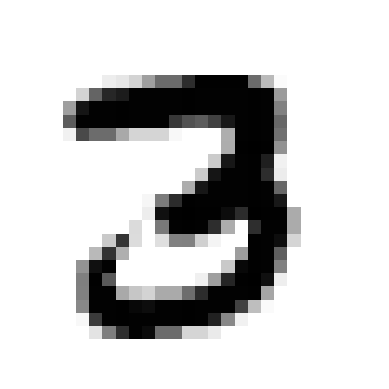

In [46]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary , interpolation = "nearest")
plt.axis("off")

In [47]:
y_train.iloc[10]

'3'

As seen here, the digit 3 is displayed by the input data stored at index 10 of the X_train df.

Correspondingly, the label for that set of inputs (stored in y_train) is '3'

## Selecting a ML Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model on the entire training set
logistic_regression_model.fit(X_train, y_train_numeric)

# Predict on the validation set
y_valid_pred = logistic_regression_model.predict(X_valid)

# Convert string labels to numeric labels in the validation set
y_valid_numeric = y_valid.astype(int)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid_numeric, y_valid_pred)

# Generate classification report for additional metrics on the validation set
class_report_valid = classification_report(y_valid_numeric, y_valid_pred, target_names=y_train.cat.categories)

print("Accuracy on Validation Set:", accuracy_valid)
print("\nClassification Report on Validation Set:\n", class_report_valid)



Accuracy on Validation Set: 0.9042857142857142

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1381
           1       0.94      0.97      0.95      1576
           2       0.90      0.88      0.89      1398
           3       0.87      0.89      0.88      1428
           4       0.91      0.90      0.90      1365
           5       0.88      0.84      0.86      1262
           6       0.93      0.94      0.93      1375
           7       0.90      0.93      0.92      1458
           8       0.88      0.85      0.87      1365
           9       0.88      0.87      0.87      1392

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



C:\Users\Advait\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


So far the accuracy of our model on the validation set has been great (around 90 percent)

Now, testing the model on the 'test set'

In [57]:
# 3. Predict on the test set
y_test_pred = logistic_regression_model.predict(X_test)

# Convert string labels to numeric labels in the test set
y_test_numeric = y_test.astype(int)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred)

# Generate classification report for additional metrics on the test set
class_report_test = classification_report(y_test_numeric, y_test_pred, target_names=y_train.cat.categories)

print("Accuracy on Test Set:", accuracy_test)
print("\nClassification Report on Test Set:\n", class_report_test)

Accuracy on Test Set: 0.9097142857142857

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1380
           1       0.95      0.97      0.96      1575
           2       0.90      0.89      0.89      1398
           3       0.89      0.89      0.89      1429
           4       0.93      0.91      0.92      1365
           5       0.89      0.84      0.86      1263
           6       0.93      0.94      0.94      1375
           7       0.93      0.92      0.93      1459
           8       0.85      0.87      0.86      1365
           9       0.89      0.90      0.90      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



We have achieved equally good accuracy on the unseen test data. The model is ready 

## Evaluating the Model by loading an image

In [62]:
from PIL import Image
import numpy as np

# Load the captured image
image_path = 'C:\\Users\\Advait\\Desktop\\Code Playground\\Image classification on MNIST\\this.png'
image = Image.open(image_path)

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Convert the image to grayscale
image = image.convert('L')

In [64]:
image

In [65]:
# Convert the image to a NumPy array
my_written = np.array(image)

# Rescale the pixel values to be in the range [0, 255]
my_written = my_written / 255.0

# Flatten the 28x28 array into a 1D array (784 elements)
my_written = my_written.reshape(1, -1)


In [67]:
# Assuming logistic_regression_model is your trained model
prediction = logistic_regression_model.predict(my_written)

# The 'prediction' variable now contains the predicted digit
print("Predicted Digit:", prediction[0])


Predicted Digit: 5


C:\Users\Advait\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
